In [111]:
import pandas as pd

In [112]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MCS\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [113]:
#we load the csv file
data = pd.read_csv(f"{path}/books.csv")
data.head(3) #print the first 3 rows

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0


## Prepare the Data

In [114]:
data.isnull().sum() # show none data at any columns

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [115]:
print(data.subtitle.shape) #shape of subtitle columns which show 6810 (rows)
print(data.subtitle.isnull().sum()) # show null at this columns

(6810,)
4429


In [116]:
import matplotlib.pyplot as plt
import seaborn as sn

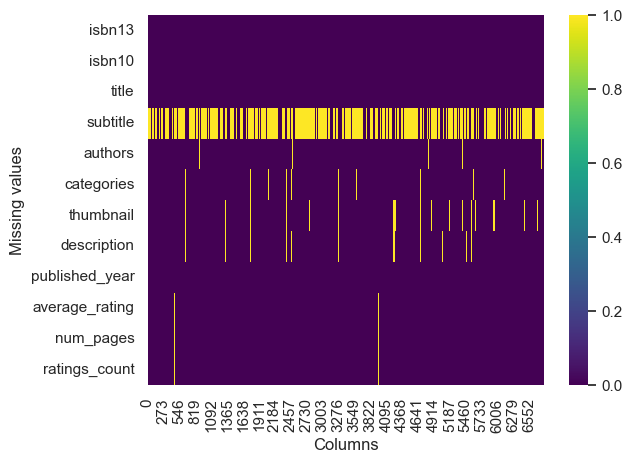

In [117]:
ax = plt.axes()
sn.heatmap(data.isna().transpose(), ax = ax, cmap='viridis', cbar='False')
# transpose:    Swaps rows and columns.
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.show()

#below graph show that the subtitle have high missing values

In [118]:
data[data.average_rating.isna()].index #print the index of missing values in av rating

Index([ 453,  454,  455,  456,  457,  458,  459,  460,  461,  462,  528,  884,
       1779, 1882, 2491, 2500, 2536, 2549, 2865, 3575, 3576, 3655, 3932, 3935,
       3962, 4375, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5958, 5961, 5962,
       5963, 5964, 5965, 5966, 5967, 6256, 6798],
      dtype='int64')

In [119]:
data.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [120]:
import numpy as np

data['missing_discription'] = np.where(data['description'].isna(),1,0)
data['missing_discription'].value_counts() #this add 1 if there is any missing values

missing_discription
0    6548
1     262
Name: count, dtype: int64

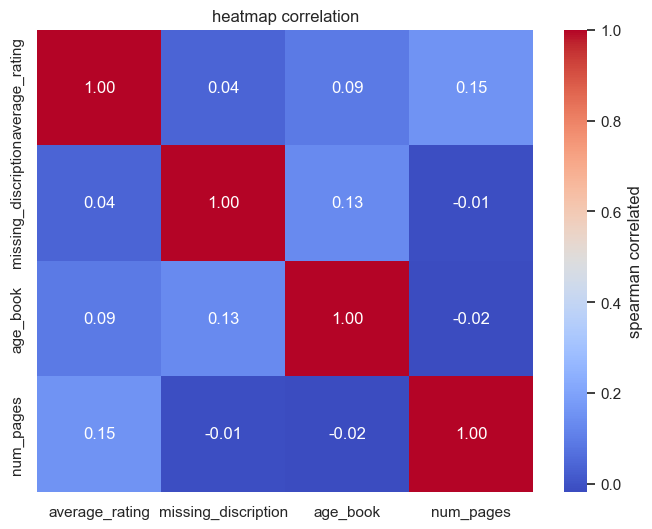

In [121]:
data['age_book'] = 2025 - data.published_year

columns_of_interest = ['average_rating', 'missing_discription', 'age_book', 'num_pages']

#find correaltion
correlation_matrix = data[columns_of_interest].corr(method = 'spearman')

sn.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sn.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='coolwarm',
                     cbar_kws = {'label':'spearman correlated'})
heatmap.set_title("heatmap correlation")
plt.show()

In [122]:
# jaha per b null(columns_of_interestA) hoga wahi rows and columns return karega ~ use karka is ka opposite hogaega
data_missing = data[~(data['average_rating'].isnull()) &
                    ~(data['description'].isnull()) &
                    ~(data['num_pages'].isnull()) &
                    ~(data['published_year'].isnull())
    
    ]
data_missing.head(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_discription,age_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [123]:
data_missing.categories.value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [124]:
data_missing.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_discription,age_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0


In [125]:
data_missing['word_count_description'] = data_missing.description.str.split().str.len()

#this will add the columns at the end at data_missing which contain lenght of each description 
#we do this b/c to remove the minimum lenght of description b/c they dont have meaning 
data_missing.sample(2)

C:\Users\MCS\AppData\Local\Temp\ipykernel_16368\3408574048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing['word_count_description'] = data_missing.description.str.split().str.len()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_discription,age_book,word_count_description
3894,9780671876999,0671876996,Forever After,NaN,Roger Zelazny,Fiction,http://books.google.com/books/content?id=H9edP...,The heroes of a millennium-long battle against...,1995.0,3.71,291.0,232.0,0,30.0,36
4609,9780756402976,0756402972,Stone of Farewell,NaN,Tad Williams,Fiction,http://books.google.com/books/content?id=BVZVP...,Battered remnants of the human army flee the e...,2005.0,4.10,608.0,35850.0,0,20.0,33


<Axes: xlabel='word_count_description'>

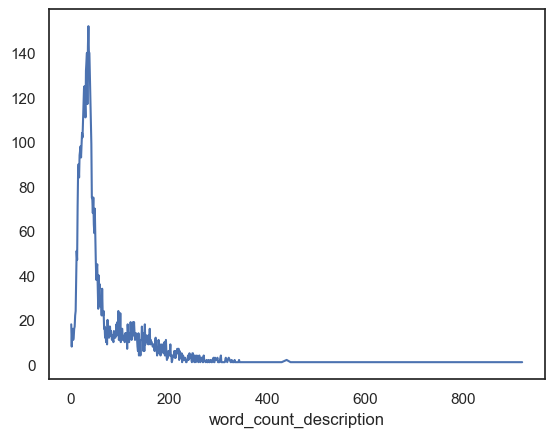

In [126]:
data_missing['word_count_description'].value_counts().sort_index().plot()

# data_missing['word_count_description'] is likely just a single column (a Series), 
# not a DataFrame, so it doesn't have a "count" column.


In [127]:
data_missing.loc[data_missing['word_count_description'].between(1,4), 'description']
# the result show that it does not give correct meaning so dont use 1 to 4

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [128]:
data_missing.loc[data_missing['word_count_description'].between(15,24), 'description']
#it does not give any meaning 

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [129]:
data_missing.loc[data_missing['word_count_description'].between(25,34), 'description']
#give proper meaning of the sentence 

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [130]:
# so we take a description that has is length is greater than 25 or eequal

data_greater_25_words = data_missing[data_missing['word_count_description'] >= 25]
print(data_greater_25_words.shape)
data_greater_25_words.sample(2)

(5197, 15)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_discription,age_book,word_count_description
6576,9781857024074,1857024079,A Thousand Orange Trees,NaN,Kathryn Harrison,Historical fiction,http://books.google.com/books/content?id=TRMwG...,"Set in 17th-century Spain, this is a twisting ...",1995.0,3.61,317.0,78.0,0,30.0,30
479,9780064403368,006440336X,Child of the Owl,Golden Mountain Chronicles: 1965,Laurence Yep,Juvenile Fiction,http://books.google.com/books/content?id=IvP2b...,Twelve-year-old Casey is waiting for the day t...,1990.0,3.60,288.0,423.0,0,35.0,114


In [131]:
data_greater_25_words['title_subtitle'] = np.where(data_greater_25_words['subtitle'].isna(), #agar null ho 
                                                  data_greater_25_words['title'], # to title ajaega
                                                  data_greater_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1)) #agar null na ho to both

#matlab jaha subtitle nahi ha waha per title ajae ga or jaha ha waha per title and subtitle dono ajaega we combine both

C:\Users\MCS\AppData\Local\Temp\ipykernel_16368\1157981404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater_25_words['title_subtitle'] = np.where(data_greater_25_words['subtitle'].isna(), #agar null ho


In [132]:
data_greater_25_words.title_subtitle.reset_index()

,index,title_subtitle
0,0,Gilead
1,1,Spider's Web: A Novel
2,3,Rage of angels
3,4,The Four Loves
4,5,The Problem of Pain
...,...,...
5192,6802,Mistaken Identity
5193,6803,Journey to the East
5194,6804,The Monk Who Sold His Ferrari: A Fable About F...
5195,6805,I Am that: Talks with Sri Nisargadatta Maharaj


In [133]:
#now combine tag(isb13) and description

data_greater_25_words['tagged_description'] = data_greater_25_words[['isbn13', 'description']].astype(str).agg(": ".join, axis=1)
#jab new columns ban jata ha to wo float hoga is liya is  str convert kia 

C:\Users\MCS\AppData\Local\Temp\ipykernel_16368\320897604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater_25_words['tagged_description'] = data_greater_25_words[['isbn13', 'description']].astype(str).agg(": ".join, axis=1)


In [134]:
data_greater_25_words.tagged_description.sample(1).reset_index()

,index,tagged_description
0,5301,9780822218739: THE STORIES: Welcome to the dar...


In [135]:
data_greater_25_words.drop(
    ['subtitle', 'missing_discription', 'age_book', 'word_count_description'],
    axis=1,
).to_csv("books_cleaned.csv", index=False)


In [136]:
data_greater_25_words.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_discription', 'age_book',
       'word_count_description', 'title_subtitle', 'tagged_description'],
      dtype='object')